# 分析

## 0. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. EDA

In [78]:
df = pd.read_csv('portpolio2_base.csv')
# データ確認
df.head(2)

,customer_unique_id,first_date,recency,monetary,frequency,avg_order_value,total_item,first_monetary,first_item_cnt,repeat_flag,top_category,top_category_cnt,category_diversity,category_share_top
0,830d5b7aaa3b6f1e9ad63703bec97d23,2016-11-09 07:47:38 UTC,707.0,NaN,1,NaN,3,NaN,3,0,health_beauty,3,1,1.000000
1,32ea3bdedab835c3aa6cb68ce66565ef,2016-10-26 14:02:13 UTC,105.0,137.16,3,45.72,3,45.46,1,1,watches_gifts,2,2,0.666667


In [3]:
# 型確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  93358 non-null  object 
 1   first_date          93350 non-null  object 
 2   recency             93350 non-null  float64
 3   monetary            93357 non-null  float64
 4   frequency           93358 non-null  int64  
 5   avg_order_value     93357 non-null  float64
 6   total_item          93358 non-null  int64  
 7   first_monetary      93357 non-null  float64
 8   first_item_cnt      93358 non-null  int64  
 9   repeat_flag         93358 non-null  int64  
 10  top_category        91982 non-null  object 
 11  top_category_cnt    93358 non-null  int64  
 12  category_diversity  93358 non-null  int64  
 13  category_share_top  93358 non-null  float64
dtypes: float64(5), int64(6), object(3)
memory usage: 10.0+ MB


In [4]:
# 欠損値確認
df.isna().sum()

customer_unique_id       0
first_date               8
recency                  8
monetary                 1
frequency                0
avg_order_value          1
total_item               0
first_monetary           1
first_item_cnt           0
repeat_flag              0
top_category          1376
top_category_cnt         0
category_diversity       0
category_share_top       0
dtype: int64

In [5]:
# 統計量確認
df.describe()

,recency,monetary,frequency,avg_order_value,total_item,first_monetary,first_item_cnt,repeat_flag,top_category_cnt,category_diversity,category_share_top
count,93350.000000,93357.000000,93358.000000,93357.000000,93358.000000,93357.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000
mean,273.145817,165.198772,1.033420,160.316648,1.180370,160.399808,1.139624,0.030003,1.153152,1.010979,0.988728
std,151.963456,226.314579,0.209097,219.572062,0.620857,220.617651,0.531705,0.170596,0.573508,0.204645,0.072783
min,0.000000,9.590000,1.000000,9.590000,1.000000,9.590000,1.000000,0.000000,1.000000,0.000000,0.200000
25%,152.000000,63.060000,1.000000,62.370000,1.000000,61.990000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,252.000000,107.780000,1.000000,105.630000,1.000000,105.370000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,383.000000,182.560000,1.000000,176.650000,1.000000,176.700000,1.000000,0.000000,1.000000,1.000000,1.000000
max,735.000000,13664.080000,15.000000,13664.080000,24.000000,13664.080000,21.000000,1.000000,24.000000,5.000000,1.000000


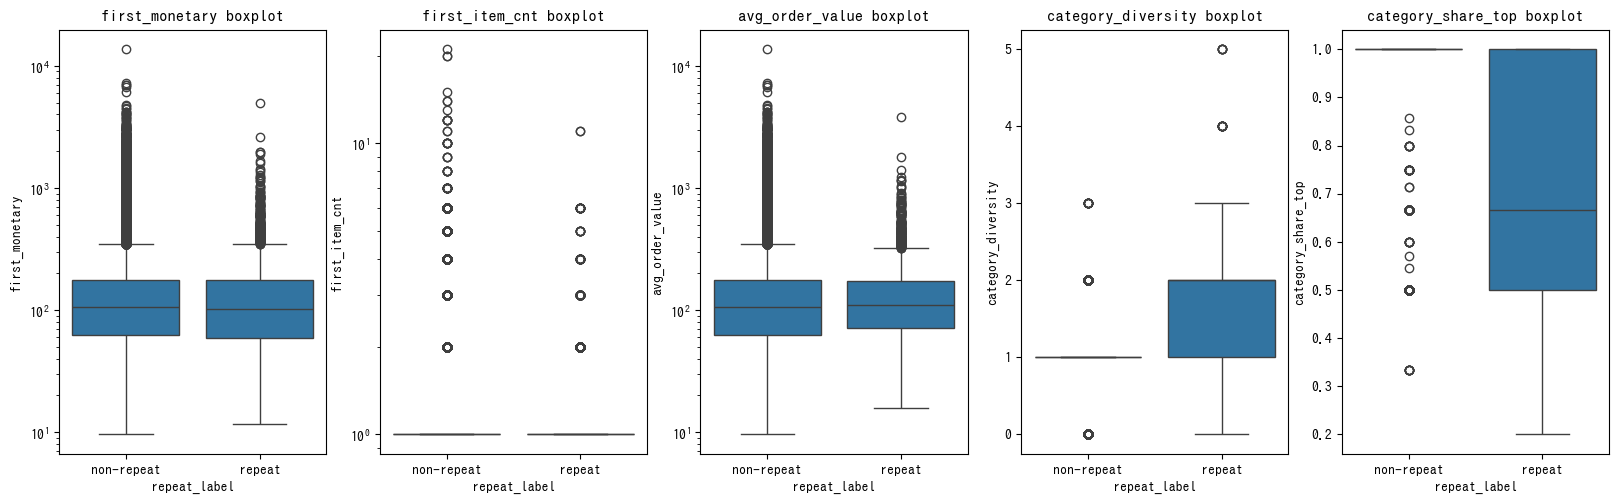

In [79]:
# 指標の分布把握
cats = ['first_monetary', 'first_item_cnt', 'avg_order_value', 'category_diversity','category_share_top']
df['repeat_label'] = df['repeat_flag'].map({0: 'non-repeat', 1: 'repeat'})

fig, axes = plt.subplots(1, 5, figsize=(20, 5.5))

for i, cat in enumerate(cats):
    sns.boxplot(data=df, x='repeat_label', y=cat, ax=axes[i])
    axes[i].set_title(f'{cat} boxplot')
    if cat in ['first_monetary', 'first_item_cnt', 'avg_order_value']:
        axes[i].set_yscale('log')

Text(0.5, 1.0, 'Top Category 15 | total')

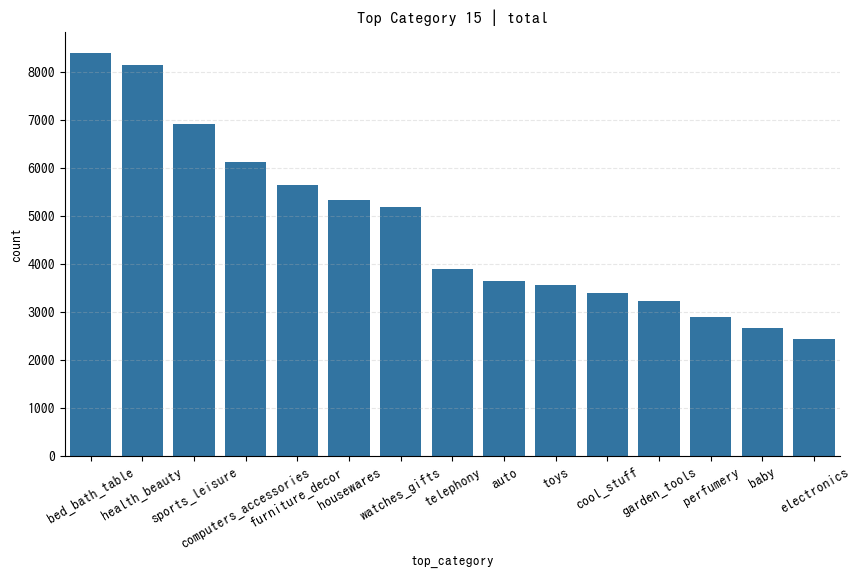

In [48]:
# トップカテゴリー確認
df_top = df.groupby('top_category').size().reset_index(name='count').sort_values('count', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(10, 5.5))
sns.barplot(data=df_top, x='top_category', y='count')
ax.tick_params(axis='x', rotation=30)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_title('Top Category 15 | total')

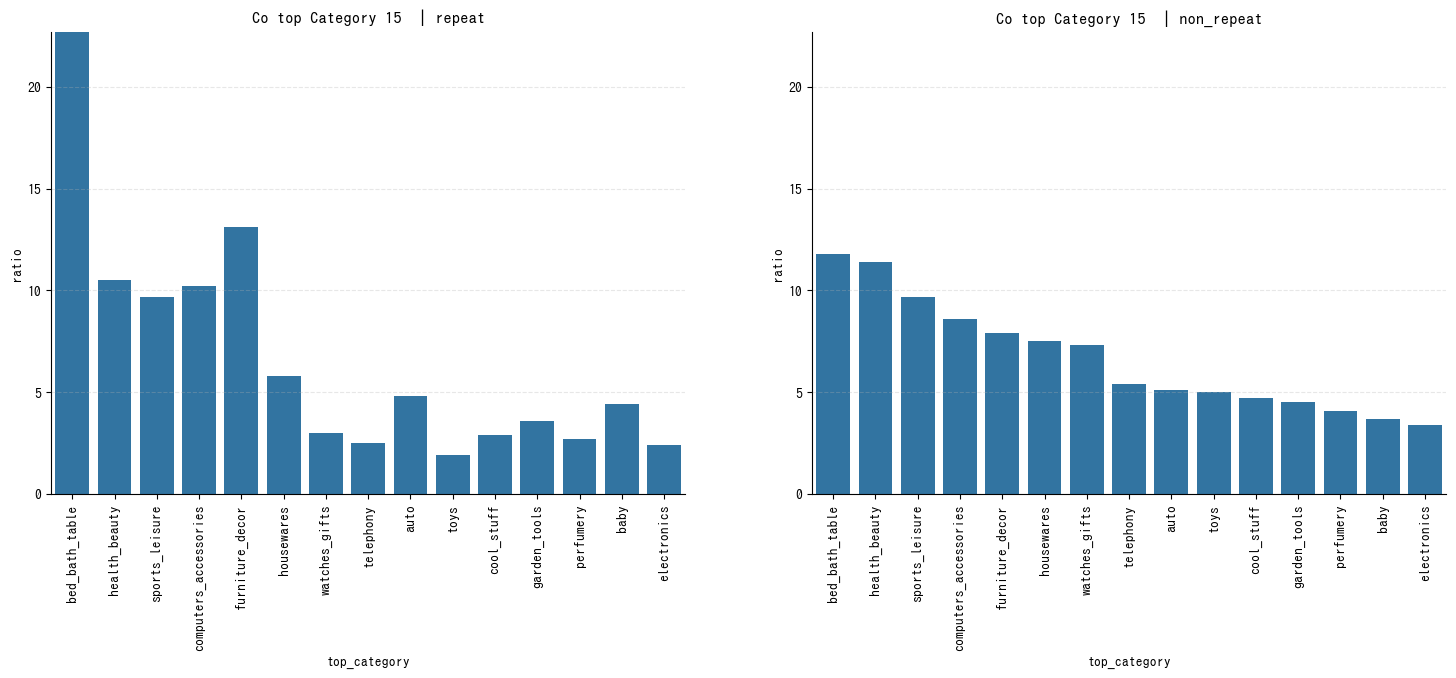

In [76]:
# リピート/ノンリピートにおける全体でのトップカテゴリー比較
top_categories = df_top['top_category']


fig, ax = plt.subplots(1, 2, figsize=(18, 6))
max_ratio = 0
df_cat_dict = {}

for name, df_ in dfs.items():
    df_cat = (
        df_
        [df_['top_category'].isin(top_categories)]
        .groupby('top_category')
        .size()
        .reindex(top_categories, fill_value=0)
        .reset_index(name='count')
    )
    
    df_cat['ratio'] = df_cat['count'] / df_cat['count'].sum() * 100
    df_cat['ratio'] = df_cat['ratio'].round(1)
    df_cat_dict[name] = df_cat
    max_ratio = max(max_ratio, df_cat['ratio'].max())

    
for i, (name, df_cat) in enumerate(df_cat_dict.items()):
    sns.barplot(data=df_cat, x='top_category', y='ratio', ax=ax[i])
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].spines[['top', 'right']].set_visible(False)
    ax[i].grid(axis='y', linestyle='--', alpha=0.3)
    ax[i].set_ylim(0, max_ratio)
    ax[i].set_title(f'Co top Category 15  | {name}')
plt.show()

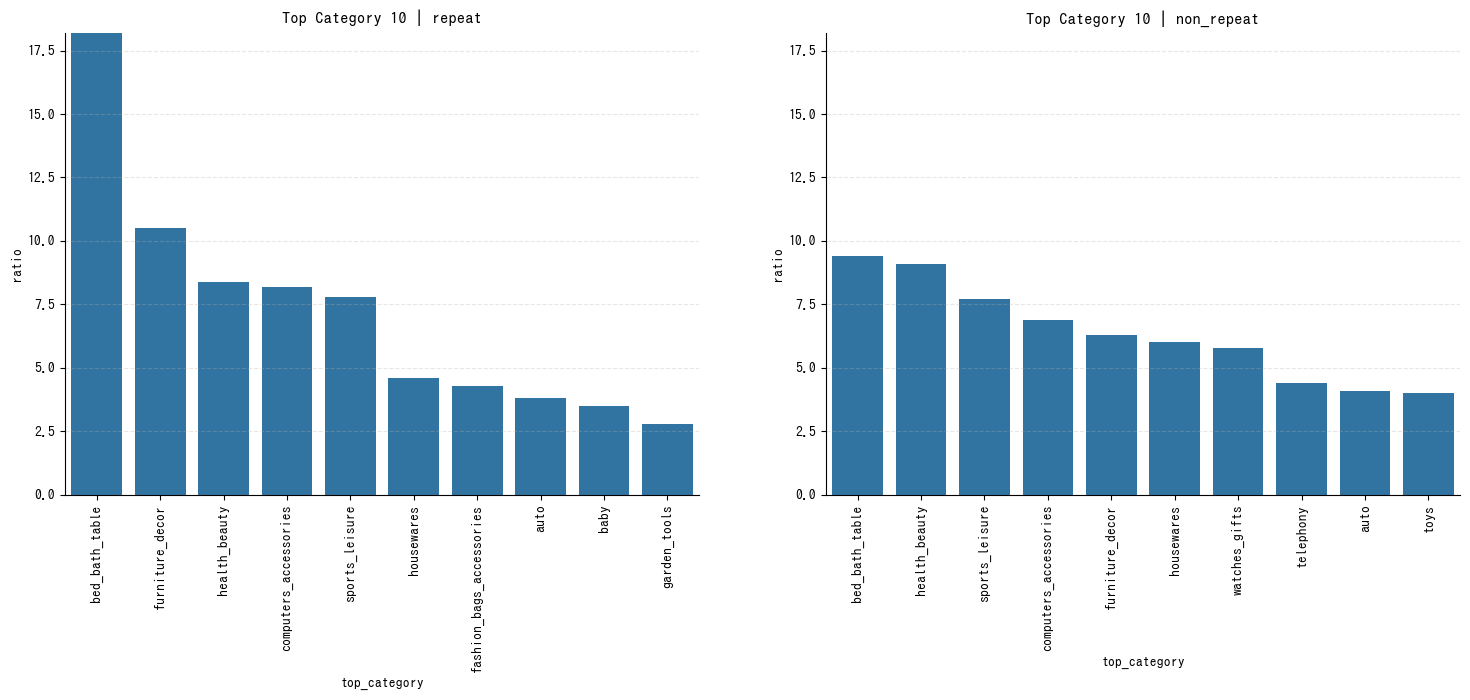

In [75]:
# リピート/ノンリピートごとのトップカテゴリー比較
df_repeat = df[df['repeat_flag'] == 1]
df_non_repeat = df[df['repeat_flag'] == 0]

dfs = {
    'repeat': df_repeat,
    'non_repeat': df_non_repeat
}

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
max_ratio = 0
df_cat_dict = {}

for name, df_ in dfs.items():
    df_cat = df_.groupby('top_category').size().reset_index(name='count')
    df_cat['ratio'] = df_cat['count'] / df_cat['count'].sum() * 100
    df_cat['ratio'] = df_cat['ratio'].round(1)
    df_cat = df_cat.sort_values('ratio', ascending=False).head(10)
    df_cat_dict[name] = df_cat
    max_ratio = max(max_ratio, df_cat['ratio'].max())

    
for i, (name, df_cat) in enumerate(df_cat_dict.items()):
    sns.barplot(data=df_cat, x='top_category', y='ratio', ax=ax[i])
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].spines[['top', 'right']].set_visible(False)
    ax[i].grid(axis='y', linestyle='--', alpha=0.3)
    ax[i].set_ylim(0, max_ratio)
    ax[i].set_title(f'Top Category 10 | {name}')
plt.show()

## 2. 解釈

EDAの結果、まず初回行動（初回購入金額・初回購入点数）や
平均購入単価について、
リピート者と非リピート者の間に
明確な差が存在するという仮説を立てていたが、
本分析の範囲ではその仮説を支持する結果は得られなかった。

一方で、購買カテゴリの広がりに着目すると、
非リピート者は単一カテゴリのみを購入しているケースが多いのに対し、
リピート者は複数カテゴリにわたって購買している傾向が見られた。
ただし、これが初回購入時点での違いなのか、
あるいはリピート後にカテゴリが拡張された結果なのかについては、
本EDAからは判断できず、追加分析の余地がある。

また、トップカテゴリの構成比を比較したところ、
非リピート者ではカテゴリ構成が相対的に分散していた一方で、
リピート者では bed_bath_table の構成比が高く、
特定カテゴリへの集中度が高い傾向が見られた。
さらに、リピート者のトップカテゴリには
fashion_bags_accessories が含まれており、
非リピート者とは異なる購買文脈が存在する可能性が示唆された。

これらの結果を踏まえると、
fashion_bags_accessories を起点として、
他にどのようなカテゴリと同時に購買されているかを分析することで、
クロスセルやプロモーション設計に活用できる示唆が得られる可能性がある。
そのため、次の分析フェーズにおいては、
共起分析などを通じて購買文脈を詳細に確認することも検討余地の一つと考えられる。
